<a href="https://colab.research.google.com/github/MangoHaha/MLFromScratch/blob/master/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import math
import sys


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/MLFromScratch')
sys.path.insert(0,"./utils")

from data_manipulation import divide_on_feature
from data_manipulation import train_test_split, standardize
from data_operation import calculate_entropy, accuracy_score
from data_operation import mean_squared_error, calculate_variance
from principal_component_analysis import PCA
from data_manipulation import train_test_split, normalize


In [0]:
class NaiveBayes():
  """The Gaussian Naive Bayes classifier. """
  def __init__(self):
    self.classes = None
    self.X = None
    self.y = None
    self.parameters_xy = []

  # Predict the class labels corresponding to the
  # samples in X
  def predict(self, X):
        y_pred = []
        for sample in X:
            y = self._classify(sample)
            y_pred.append(y)
        return y_pred  
  def fit(self, X, y):
    self.X = X
    self.y = y
    self.classes = np.unique(y)
    #pre calculate mean and variance for each feature for each class
    #Will use for probability density calculation
    for i in range(len(self.classes)):
      #only working on for specific class
      cl = self.classes[i]
      x_where_c = X[np.where(y == cl)]
      parameters_x = []
      self.parameters_xy.append([])
      for j in range(np.shape(x_where_c)[1]):
        col = x_where_c[:, j]
        parameters = {}
        parameters["mean"] = col.mean()
        parameters['var'] = col.var()

        parameters_x.append(parameters)
        self.parameters_xy[i].append(parameters_x)

  def _calculate_prob(self, mean, var, x):
    coeff = (1.0/(math.sqrt((2.0*math.pi)*var)))
    exponent = math.exp(-(math.pow(x-mean, 2)/(2 * var)))
    return coeff * exponent


  # Calculate the prior of class c (samples where class == c / total number
  # of samples)
  def _cal_prior(self, c):
    # Selects the rows where the class label is c
    x_where_c = self.X[np.where(self.y == c)]
    return np.shape(x_where_c)[0]/np.shape(self.X)[0]

  # Classify using Bayes Rule, P(Y|X) = P(X|Y)*P(Y)/P(X)
  # P(X|Y) - Probability. Gaussian distribution (given by calculate_probability)
  # P(Y) - Prior (given by calculate_prior)
  # P(X) - Scales the posterior to the range 0 - 1 (ignored)
  # Classify the sample as the class that results in the largest P(Y|X)
  # (posterior)

  def _classify(self, samples):
    posteriors = []
    for i in range(len(self.classes)):
      cl = self.classes[i]
      x_where_c = self.X[np.where(self.y == cl)]
      prior = np.shape(x_where_c)[0]/np.shape(self.X)[0]
      #prior = _cal_prior(cl)
      posterior = prior
      # multiply with the additional probabilties
      # Naive assumption (independence):
      # P(x1,x2,x3|Y) = P(x1|Y)*P(x2|Y)*P(x3|Y)
      for j, params in enumerate(self.parameters_xy[i]):
        sample_feature = j
        mean = params[j]["mean"]
        var = params[j]["var"]
        coeff = (1.0/(math.sqrt((2.0*math.pi)*var)))
        exponent = math.exp(-(math.pow(samples[i]-mean, 2)/(2 * var)))
        prob = coeff*exponent
        posterior *= prob
      posteriors.append(posterior)
      # Get the largest probability and return the class corresponding
      # to that probability
      index_of_max = np.argmax(posteriors)
      max_value = posteriors[index_of_max]
      return self.classes[index_of_max]




    

Accuracy: 0.37333333333333335


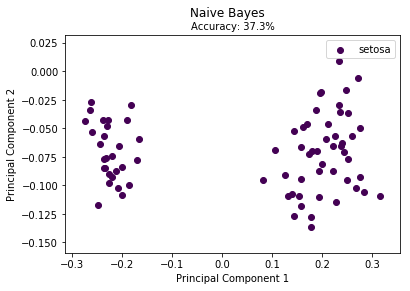

In [72]:
def main():
    data = datasets.load_iris()
    X = normalize(data.data)
    y = data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

    clf = NaiveBayes()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print ("Accuracy:", accuracy)

    # Reduce dimension to two using PCA and plot the results
    pca = PCA()
    pca.plot_in_2d(X_test, y_pred, title="Naive Bayes", accuracy=accuracy, legend_labels=data.target_names)

if __name__ == "__main__":
    main()